# Creating a simple Web Application with Python and Flask

## Libraries and settings

In [1]:
# Libraries
import os
import io
import base64
import webbrowser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, Response, request, render_template

# Background color of graphic
plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_12\exercises\flask_matplotlib_examples


## Flask app with HTML-template

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/May/2023 17:05:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 17:05:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/May/2023 17:05:35] "POST / HTTP/1.1" 200 -


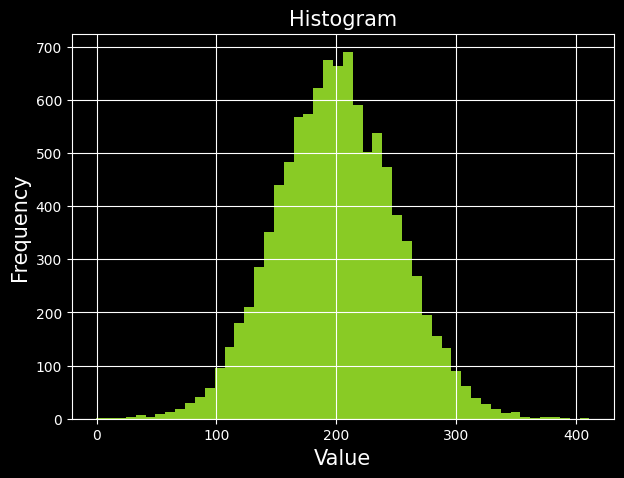

In [2]:
app = Flask(__name__, template_folder='.', static_folder='.')

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':

        # Parse parameters from the URL query string
        obs = int(request.form['obs'])
        mean = float(request.form['mean'])
        stddev = float(request.form['stddev'])

        # Generate random data for the histogram
        data = np.random.normal(mean, stddev, obs)

        # Create histogram
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.hist(data, bins=50, color="greenyellow", alpha=0.8)
        ax.set_xlabel('Value', fontsize=15)
        ax.set_ylabel('Frequency', fontsize=15)
        ax.set_title('Histogram', fontsize=15)
        ax.grid()

        # Save the plot to a .png image in memory
        img = io.BytesIO()
        fig.savefig(img, format='png')
        img.seek(0)

        # Plot url
        plot_url = base64.b64encode(img.getvalue()).decode()

        return render_template('index.html', plot_url=plot_url)
    else:
        return render_template('index.html')

if __name__ == '__main__':
    app.run()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')